# Step0. 設定
- Google Drive 設定

In [ ]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
import os

GDRIVE_APP_BASE_DIR_PATH = "/drive/My Drive/app"
# GDRIVE_DARKNET_BIN_FILE_PATH = GDRIVE_APP_BASE_DIR_PATH+"/darknet"

CONTENT_DIR = "/content/"

# Step1.下載weight & cfg
- 可以參考官方的 model zoo
- https://github.com/AlexeyAB/darknet/wiki/YOLOv4-model-zoo

In [ ]:
# 移動到我們存放 Darknet 的路徑下
os.chdir(CONTENT_DIR)

# 下載Yolo v4的權重檔到這個資料夾內
!gdown --id '1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT'

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/gdown/cli.py", line 61, in main
    quiet=args.quiet,
  File "/usr/local/lib/python2.7/dist-packages/gdown/download.py", line 52, in download
    res = sess.get(url, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 543, in get
    return self.request('GET', url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 530, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 643, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/adapters.py", line 449, in send
    timeout=timeout
  File "/usr/local/lib/python2.7/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python2.7/dist-packages/u

# Step 3. 轉成 tensorflow 的方法來預測

雖然 Yolo 是一個世界知名的模型，但是作者選擇使用自己的開發框架來搭起 Yolo 這個演算法，也就是我們所使用的 Darknet 框架，與其他知名的深度學習框架並不相容，例如 Tensorflow, caffe, pytorch等等，這裡我們可以練習把他轉成 tensorflow 可以使用的方法，並且能夠靈活運用它。

In [ ]:
# 首先我們要先下載別人幫我們做好的轉換工具
os.chdir(GDRIVE_APP_BASE_DIR_PATH)
!git clone https://github.com/MagicUmom/tensorflow-yolov4-tflite.git

fatal: destination path 'tensorflow-yolov4-tflite' already exists and is not an empty directory.


In [ ]:
os.chdir(GDRIVE_APP_BASE_DIR_PATH+'/tensorflow-yolov4-tflite')
!python save_model.py --weights {CONTENT_DIR}/yolov4.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4 


## yolov4-tiny
## !python save_model.py --weights ./data/yolov4-tiny.weights --output ./checkpoints/yolov4-tiny-416 --input_size 416 --model yolov4 --tiny


2020-11-13 18:00:39.938978: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-13 18:00:41.265032: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-13 18:00:41.278413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-13 18:00:41.279028: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-11-13 18:00:41.279071: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-13 18:00:41.280620: I tensorflow/stream_executor/pl

In [ ]:
# 來預測一張圖片試試看
# 會輸出在 result.png
!python detect.py


2020-11-13 18:01:37.468837: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-13 18:01:38.884913: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-13 18:01:38.899260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-13 18:01:38.899953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-11-13 18:01:38.900002: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-13 18:01:38.901738: I tensorflow/stream_executor/pl

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

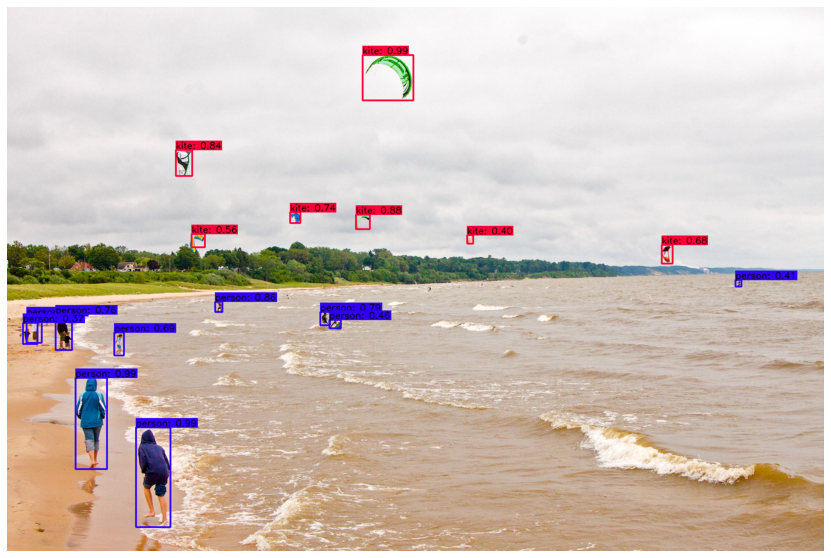

In [ ]:
os.chdir(GDRIVE_APP_BASE_DIR_PATH+'/tensorflow-yolov4-tflite')
imShow('result.png')

我們也可以自行把預測用的 python 檔拿出來作修改

In [ ]:
# 一次預測一個資料夾內的圖片檔, png/jpg
# 輸出預測完的圖片會在 output資料夾下
# 同時也會輸出一個 csv 檔案裡面包含圖片裡面有哪些預測的類別

!python detect_dir.py

2020-11-13 08:58:24.175188: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-13 08:58:25.481088: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-13 08:58:25.505877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-13 08:58:25.506465: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-11-13 08:58:25.506509: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-13 08:58:25.508040: I tensorflow/stream_executor/platform/defaul

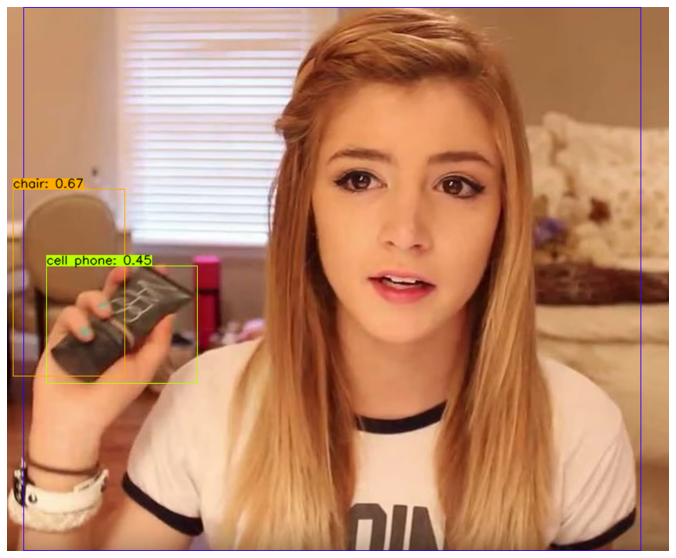

In [ ]:
os.chdir(GDRIVE_APP_BASE_DIR_PATH+'/tensorflow-yolov4-tflite')
imShow('output/girl_result.png')